In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

In [3]:
storage = os.environ['MICOM_EXP'] + 'test_RKTolerance/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t", usecols=['communityID','case', 'culture_type', 'run_time'])

run_status

/data/s4278836/First_project/experiments/test_RKTolerance/


communityID    case culture_type  run_time
0      I_a_I_b   RKTo4        batch  00:42:36
1      I_a_I_b   RKTo4   continuous  01:48:45
2      I_a_I_b   RKTo5        batch  00:43:53
3      I_a_I_b   RKTo5   continuous  01:49:27
4      I_a_I_b   RKTo6        batch  00:42:54
5      I_a_I_b   RKTo6   continuous  01:49:41
6   II_b_III_b   RKTo4        batch  00:12:52
7   II_b_III_b   RKTo4   continuous  06:59:20
8   II_b_III_b   RKTo5        batch  00:12:54
9   II_b_III_b   RKTo5   continuous  07:12:31
10  II_b_III_b   RKTo6        batch  00:13:20
11  II_b_III_b   RKTo6   continuous  19:14:05
12  III_b_IV_a   RKTo4        batch  00:05:12
13  III_b_IV_a   RKTo4   continuous  07:29:01
14  III_b_IV_a   RKTo5        batch  00:05:12
15  III_b_IV_a   RKTo5   continuous  07:29:16
16  III_b_IV_a  RKTo6a   continuous  02:00:34
17  III_b_IV_a   RKTo6        batch  00:05:23
18  III_b_IV_a   RKTo6   continuous  12:54:03

In [4]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    sec = int(h) * 3600 + int(m) * 60 + int(s)
    return sec

def get_hour(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    sec = int(h) * 3600 + int(m) * 60 + int(s)
    hour = float(sec)/3600
    return hour

In [5]:
run_status['run_time_sec'] = run_status['run_time'].apply(get_sec)
run_status['run_time_hour'] = run_status['run_time'].apply(get_hour)

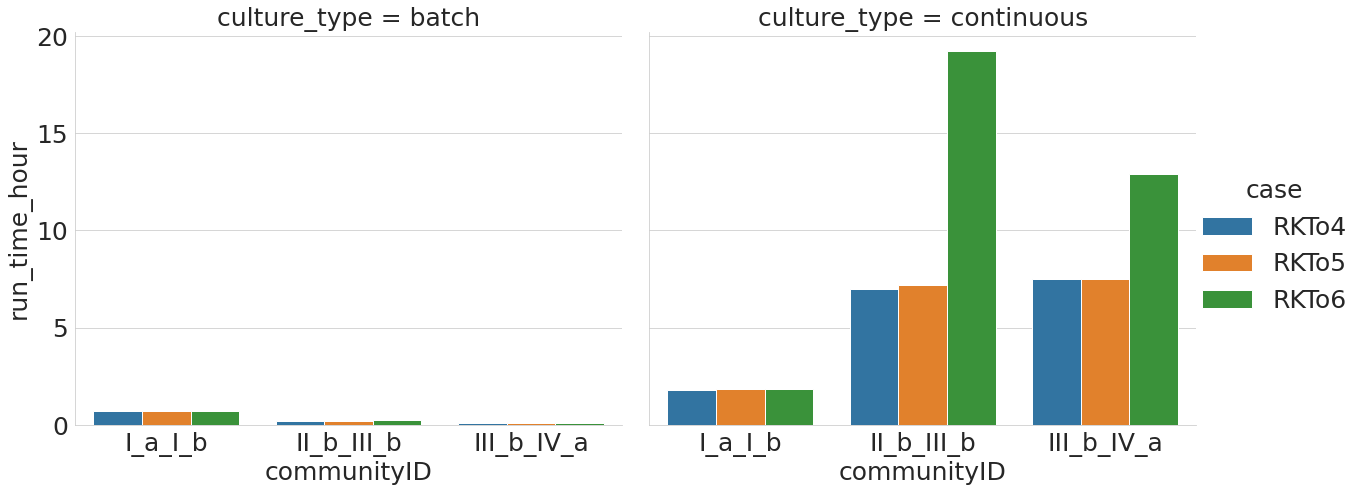

In [6]:
plot_data = run_status.loc[run_status['case'] != 'RKTo6a', :] # because RKTo6a only run on 2 diets (EU_avg & mediterranean)

g = sns.catplot(data = plot_data, x='communityID', y='run_time_hour', hue='case', col='culture_type', 
                kind='bar', height=7, aspect=1.2)